In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# ---- Fix MKL memory leak warning ----
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [2]:
#Libraries used
import os
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


In [3]:
#Data Set
EmpAttr_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
#Data Preprocessing

#Convrting Categorical Data into Numeric for CLuster Analysis
EmpAttr_df['BusinessTravel'] = EmpAttr_df['BusinessTravel'].astype('category').cat.codes
EmpAttr_df['EducationField'] = EmpAttr_df['EducationField'].astype('category').cat.codes
EmpAttr_df['Gender'] = EmpAttr_df['Gender'].astype('category').cat.codes
EmpAttr_df['JobRole'] = EmpAttr_df['JobRole'].astype('category').cat.codes
EmpAttr_df['MaritalStatus'] = EmpAttr_df['MaritalStatus'].astype('category').cat.codes
EmpAttr_df['OverTime'] = EmpAttr_df['OverTime'].astype('category').cat.codes
EmpAttr_df['Department'] = EmpAttr_df['OverTime'].astype('category').cat.codes
EmpAttr_df['Attrition'] = EmpAttr_df['Attrition'].astype('category').cat.codes

#Removing Irrelevant Columns
EmpAttr_df = EmpAttr_df.drop(columns=['Over18', 'StandardHours', 'EmployeeCount', 'Attrition'])



In [5]:
# Handle missing values (if any)
EmpAttr_df.fillna(EmpAttr_df.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
EmpAttr_df_scaled = scaler.fit_transform(EmpAttr_df)

In [6]:
pca = PCA(n_components=30) 
df_pca = pca.fit_transform(EmpAttr_df_scaled)

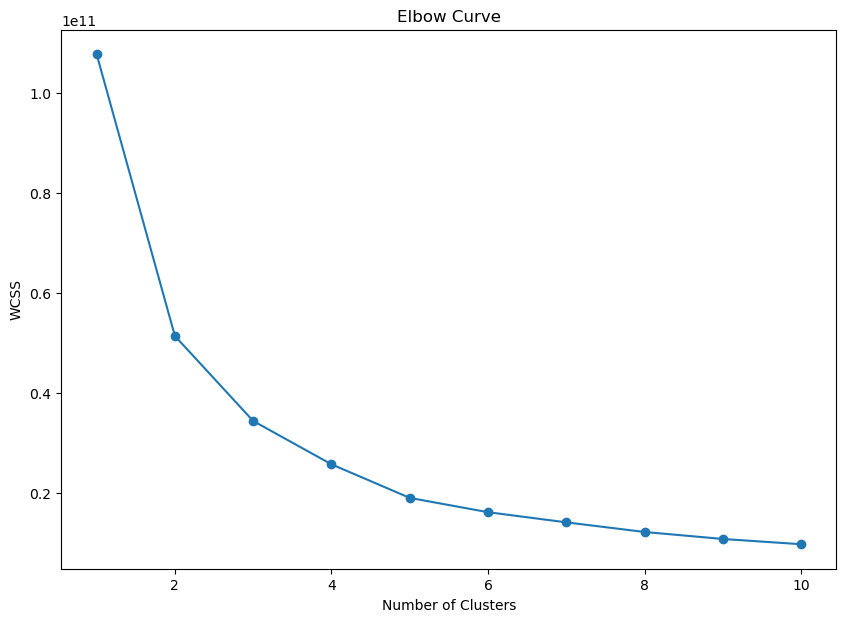

In [28]:
# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10,random_state=42)
    kmeans.fit(EmpAttr_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
#Kmeans Cluster Analysis
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)  
clusters = kmeans.fit_predict(EmpAttr_df_scaled)  

# Add cluster labels to the original dataframe
EmpAttr_df['Cluster'] = clusters

In [36]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(EmpAttr_df_scaled)

print("Cluster labels:", kmeans.labels_)
print("Cluster centers:", kmeans.cluster_centers_)

print(EmpAttr_df.head())

Cluster labels: [1 1 1 ... 1 0 1]
Cluster centers: [[ 6.34571397e-01 -2.80889711e-04 -1.78609360e-02 -3.27511389e-02
  -6.01425741e-03  1.58409365e-01 -3.44892565e-02 -4.31924526e-02
   5.82396035e-02 -4.20513261e-02 -1.16447233e-02  1.76535370e-02
   1.01850615e+00 -1.17422757e-01  1.26242255e-02 -1.06820876e-01
   9.83924809e-01  2.26994164e-02  5.32537047e-02 -3.27511389e-02
  -2.97006203e-02  8.07002402e-03  2.20259990e-02  8.32712085e-02
   1.00830418e+00 -9.12925785e-03  1.29726931e-02  9.56273994e-01
   9.36225681e-01  7.95065620e-01  8.87158218e-01]
 [-2.94532142e-01  1.30373113e-04  8.29003602e-03  1.52012258e-02
   2.79147804e-03 -7.35246653e-02  1.60079617e-02  2.00474929e-02
  -2.70315291e-02  1.95178466e-02  5.40482177e-03 -8.19377315e-03
  -4.72732932e-01  5.45010009e-02 -5.85945130e-03  4.95802076e-02
  -4.56682232e-01 -1.05357849e-02 -2.47173570e-02  1.52012258e-02
   1.37853477e-02 -3.74564860e-03 -1.02232226e-02 -3.86497840e-02
  -4.67997759e-01  4.23728502e-03 -6.021

In [10]:
dropped_column = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
EmpAttr_df['Attrition'] = dropped_column['Attrition'] 

cluster_summary = EmpAttr_df.groupby('Cluster')['Attrition'].value_counts(normalize=True).unstack()
print(cluster_summary)



Attrition        No       Yes
Cluster                      
0          0.806647  0.193353
1          0.905660  0.094340


In [11]:
EmpAttr_df['Attrition'] = EmpAttr_df['Attrition'].astype('category').cat.codes
EmpAttr_df['BusinessTravel'] = EmpAttr_df['BusinessTravel'].astype('category').cat.codes
EmpAttr_df['EducationField'] = EmpAttr_df['EducationField'].astype('category').cat.codes
EmpAttr_df['Gender'] = EmpAttr_df['Gender'].astype('category').cat.codes
EmpAttr_df['JobRole'] = EmpAttr_df['JobRole'].astype('category').cat.codes
EmpAttr_df['MaritalStatus'] = EmpAttr_df['MaritalStatus'].astype('category').cat.codes
EmpAttr_df['OverTime'] = EmpAttr_df['OverTime'].astype('category').cat.codes
EmpAttr_df['Department'] = EmpAttr_df['OverTime'].astype('category').cat.codes


X=X = EmpAttr_df.drop(columns=['Attrition','EmployeeNumber'])
y=EmpAttr_df['Attrition'] 

In [12]:
model = RandomForestClassifier()
model.fit(X, y)
importance = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                     Feature  Importance
15             MonthlyIncome    0.079203
0                        Age    0.065851
2                  DailyRate    0.053043
23         TotalWorkingYears    0.050458
4           DistanceFromHome    0.050013
9                 HourlyRate    0.049476
16               MonthlyRate    0.047032
26            YearsAtCompany    0.040419
3                 Department    0.034464
18                  OverTime    0.034393
19         PercentSalaryHike    0.034290
17        NumCompaniesWorked    0.034190
12                   JobRole    0.033082
7    EnvironmentSatisfaction    0.031395
13           JobSatisfaction    0.029763
22          StockOptionLevel    0.029393
29      YearsWithCurrManager    0.028087
27        YearsInCurrentRole    0.027723
24     TrainingTimesLastYear    0.026188
11                  JobLevel    0.026113
25           WorkLifeBalance    0.025107
21  RelationshipSatisfaction    0.024968
10            JobInvolvement    0.024386
6             Ed

In [13]:
results = permutation_importance(model, X, y, scoring='accuracy')
importance = results.importances_mean
for i, v in enumerate(importance):
    print(f'Feature: {i}, Score: {v}')

Feature: 0, Score: 0.016734693877551
Feature: 1, Score: 0.0
Feature: 2, Score: 0.006122448979591822
Feature: 3, Score: 0.026530612244897944
Feature: 4, Score: 0.013877551020408174
Feature: 5, Score: 0.0
Feature: 6, Score: 0.004353741496598662
Feature: 7, Score: 0.0092517006802721
Feature: 8, Score: 0.0
Feature: 9, Score: 0.005306122448979589
Feature: 10, Score: 0.0032653061224489745
Feature: 11, Score: 0.005578231292517
Feature: 12, Score: 0.012244897959183664
Feature: 13, Score: 0.011156462585034022
Feature: 14, Score: 0.005850340136054432
Feature: 15, Score: 0.024217687074829942
Feature: 16, Score: 0.004489795918367378
Feature: 17, Score: 0.009659863945578207
Feature: 18, Score: 0.030612244897959197
Feature: 19, Score: 0.005986394557823127
Feature: 20, Score: 0.0
Feature: 21, Score: 0.00312925170068028
Feature: 22, Score: 0.02517006802721087
Feature: 23, Score: 0.005306122448979589
Feature: 24, Score: 0.0016326530612244873
Feature: 25, Score: 0.004897959183673461
Feature: 26, Score: 